# Team-members:
## (1) Nirav Solanki : B00808427 : nr952727@dal.ca
## (2) Aditya Gadhvi: B00809664 : ad742065@dal.ca

## CSCI-5901 Assignment-1

# Introduction

### Dataset explanation:

##### This dataset consists of a large number of dataset records related to Zomato restaurants, more particularly restaurants located in Bangalore India. The attributes of this dataset are url, address, name, online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, approx_cost(for two people), reviews_list, menu_item, listed_in(type), and listed_in(city). Some of the most important attributes in this dataset are rate, votes, location, and approx._cost(for two people). These are the attributes which can be used to predict the approximate cost of a new restaurant( on the basis of other attributes) and also determine the popularity of a restaurant. There are also some irrelevant attributes in the dataset such as url and phone, which can be considered as least useful since they are not useful in most of the data analysis tasks. Apart from this, attributes such as rate, votes, rest_type, location and approx._cost can be used to determine the characteristics which makes a restaurant more popular. For instance, we can group all of the restaurants which has high votes/rate and then we can study the other attributes related to these restaurants such as rest_type, location, etc. Through such tasks we can determine the things which makes a restaurant more popular. An attribute named reviews_list is the most uncleaned attribute. It contains large sentences and analyzing the records of this attributes would be a really complex process since it will include a lot of splitting and cleaning tasks. In addition to this, menu_item is also an unclean attribute since it contains large number of null values which will hardly make any contribution to any type of data analysis. 



# Data Loading 
##### Here pandas read_csv() method has been used to load the Zomato dataset. The dataset has been first locally installed into the computer and then is loaded into Jupyter notebook through this pandas function. 

In [1]:
import pandas as pd
df = pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data Cleaning

In [2]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### As number of null values were less in location and cuisines, we decided to remove the tuples entirely

In [3]:
df = df[pd.notnull(df["cuisines"])]
df = df.reset_index(drop=True)
df = df[pd.notnull(df["rest_type"])]
df = df.reset_index(drop=True)
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7686
votes                              0
phone                           1175
location                           0
rest_type                          0
dish_liked                     27897
cuisines                           0
approx_cost(for two people)      318
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### We used four parameters address, name, rest_type, and cuisines for detecting and dropping duplicate values. We used subset because the rows had minor differences in insignificant columns. We have used the duplicated() method to identify the duplicates in the dataset and after that we used the drop_duplicates() method to remove all of the duplicates. By using duplicated() method we came to know that the dataframe contained 38438 duplicate rows. Before removing the duplicates the dataframe consisted of around 51,466 total rows, but after removing the duplicates the resultant dataframe contained around 13028 rows. 

In [4]:
dupes=df.duplicated(["name","address","rest_type","cuisines"])
sum(dupes)

38438

In [27]:
df.drop_duplicates(subset =["name","address","rest_type","cuisines"], 
                     keep = "first", inplace = True) 
df = df.reset_index(drop=True)
df.count()

url                            13028
address                        13028
name                           13028
online_order                   13028
book_table                     13028
rate                           13028
votes                          13028
phone                          12755
location                       13028
rest_type                      13028
dish_liked                      4896
cuisines                       13028
approx_cost(for two people)    13028
reviews_list                   13028
menu_item                      13028
listed_in(type)                13028
listed_in(city)                13028
cost_category                  13028
rate_category                  13028
dtype: int64

#### The rating column still had null, 'NEW' and '-'. We calculated the average of rest of the values and replaced null, 'NEW' and '-' with the average. We also converted the rating values into float.

In [28]:
import numpy as np
df["rate"].replace("NEW",np.nan,regex=True,inplace = True)
df["rate"].replace("-",np.nan,regex=True,inplace = True)
df["rate"].replace("/5","",regex=True,inplace = True)
df["rate"] = df['rate'].astype(float)
average_rate = df["rate"].mean() 
df["rate"].fillna(average_rate,inplace=True)
df["rate"].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.63002664, 2.9       , 3.5       , 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

### Approx_cost had ',' in many of the records. So we first removed them and then converted the approximate cost into float and we removed null values.

In [29]:
df["approx_cost(for two people)"].replace(",","",regex=True,inplace = True)
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].astype(float)
average_cost = df["approx_cost(for two people)"].mean()
df["approx_cost(for two people)"].fillna(average_cost,inplace=True)
df["approx_cost(for two people)"].astype(int).unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700,  487,
       1400,  180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000,
       2800, 3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,
         70, 3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000,
       3700, 1650, 2700, 4500,  140], dtype=int64)

# Useless columns
### We determined some useless attributes such as url, addresss, name, review_list, dish_liked, listed_in(city), menu_item and phone. The attribute location is already given in the dataset, hence there is no need of listed_in(city) since both of them shows the same values which creates data redundancy. The attributes url and address are also irrelevant to the task at hand since they are not useful for predicting the approximate cost of a meal for two people. The attribute reviews_list can be useful for text processing or semantic analysis( because it contains a lot of text data that can must be separated or splitted for analysis) but it is not useful for predicting a numeric quantity such as approximate cost. The attribute menu_item is an useless attribute because it contains a very large number of null values. Hence it is better to drop that entire column. 

# Plot distribution of attributes(frequency)
### We have used matplotlib bar-chart to plot the distribution of the attributes(frequency). 

{'No': 6017, 'Yes': 7011}


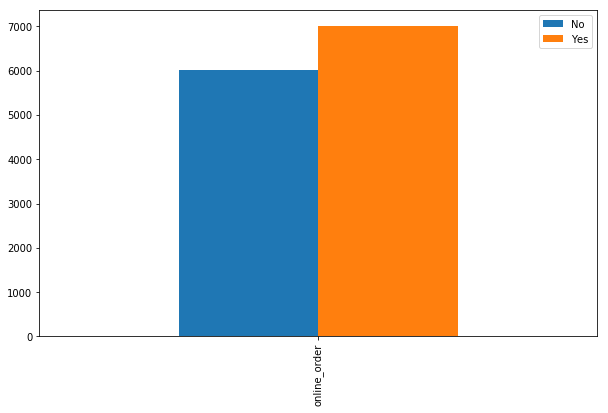

In [17]:
import matplotlib.pyplot as plt
classes=np.unique(df["online_order"])
dic={}
for i in classes:
    dic[i]=len(np.where(df["online_order"]==i)[0])
    
print(dic)
_=pd.DataFrame(dic,index=['online_order']).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,6)

{'No': 12021, 'Yes': 1007}


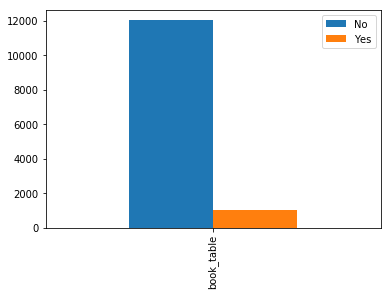

In [9]:
classes=np.unique(df["book_table"])
dic={}
for i in classes:
    dic[i]=len(np.where(df["book_table"]==i)[0])
    
print(dic)
_=pd.DataFrame(dic,index=['book_table'],columns=dic).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,6)

{'BTM': 792, 'Banashankari': 298, 'Banaswadi': 211, 'Bannerghatta Road': 485, 'Basavanagudi': 219, 'Basaveshwara Nagar': 105, 'Bellandur': 388, 'Bommanahalli': 103, 'Brigade Road': 153, 'Brookefield': 191, 'CV Raman Nagar': 45, 'Central Bangalore': 2, 'Church Street': 62, 'City Market': 45, 'Commercial Street': 48, 'Cunningham Road': 52, 'Domlur': 103, 'East Bangalore': 23, 'Ejipura': 66, 'Electronic City': 724, 'Frazer Town': 205, 'HBR Layout': 47, 'HSR': 722, 'Hebbal': 8, 'Hennur': 66, 'Hosur Road': 17, 'ITPL Main Road, Whitefield': 50, 'Indiranagar': 614, 'Infantry Road': 15, 'JP Nagar': 541, 'Jakkur': 1, 'Jalahalli': 22, 'Jayanagar': 388, 'Jeevan Bhima Nagar': 82, 'KR Puram': 13, 'Kaggadasapura': 59, 'Kalyan Nagar': 253, 'Kammanahalli': 188, 'Kanakapura Road': 13, 'Kengeri': 1, 'Koramangala': 9, 'Koramangala 1st Block': 169, 'Koramangala 2nd Block': 11, 'Koramangala 3rd Block': 23, 'Koramangala 4th Block': 135, 'Koramangala 5th Block': 287, 'Koramangala 6th Block': 154, 'Koramangal

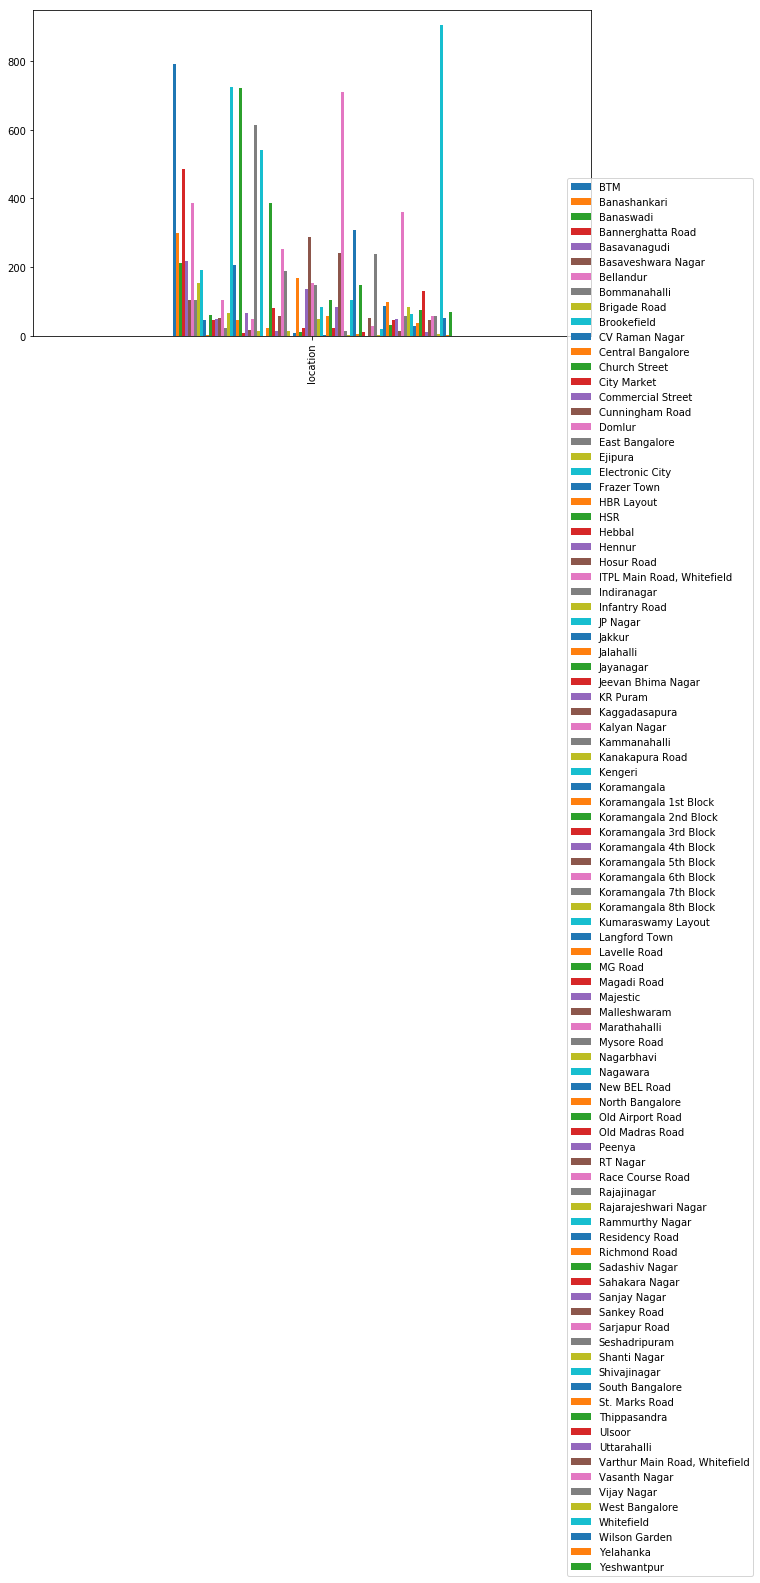

In [10]:
classes=np.unique(df["location"])
dic={}
for i in classes:
    dic[i]=len(np.where(df["location"]==i)[0])
    
print(dic)
_=pd.DataFrame(dic,index=['location'],columns=dic).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,6)
_.legend(loc='upper right',bbox_to_anchor=(1.3, 0.5))

{'Buffet': 309, 'Cafes': 606, 'Delivery': 8997, 'Desserts': 609, 'Dine-out': 2477, 'Drinks & nightlife': 9, 'Pubs and bars': 21}


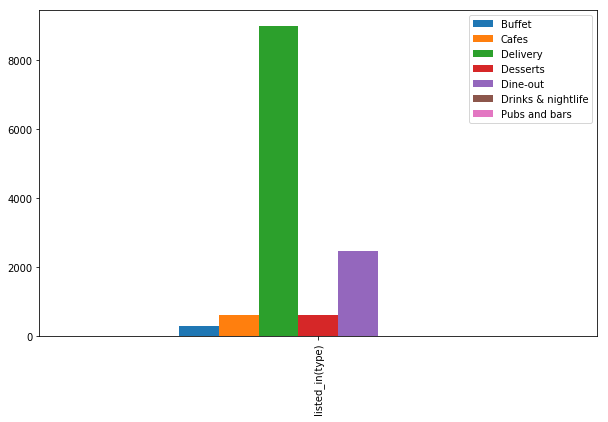

In [11]:
classes=np.unique(df["listed_in(type)"])
dic={}
for i in classes:
    dic[i]=len(np.where(df["listed_in(type)"]==i)[0])
    
print(dic)
_=pd.DataFrame(dic,index=['listed_in(type)']).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,6)

{'BTM': 1484, 'Banashankari': 599, 'Bannerghatta Road': 1071, 'Basavanagudi': 401, 'Bellandur': 790, 'Brigade Road': 1048, 'Brookefield': 979, 'Church Street': 114, 'Electronic City': 726, 'Frazer Town': 278, 'HSR': 483, 'Indiranagar': 769, 'JP Nagar': 105, 'Jayanagar': 193, 'Kalyan Nagar': 725, 'Kammanahalli': 67, 'Koramangala 4th Block': 310, 'Koramangala 5th Block': 37, 'Koramangala 6th Block': 35, 'Koramangala 7th Block': 54, 'Lavelle Road': 178, 'MG Road': 64, 'Malleshwaram': 699, 'Marathahalli': 402, 'New BEL Road': 325, 'Old Airport Road': 139, 'Rajajinagar': 272, 'Residency Road': 24, 'Sarjapur Road': 150, 'Whitefield': 507}


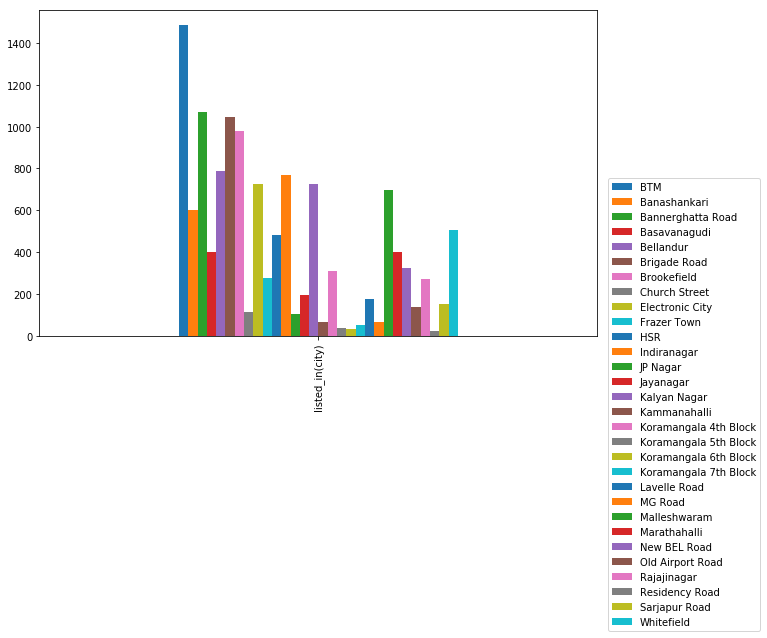

In [12]:
classes=np.unique(df["listed_in(city)"])
dic={}
for i in classes:
    dic[i]=len(np.where(df["listed_in(city)"]==i)[0])
    
print(dic)
_=pd.DataFrame(dic,index=['listed_in(city)']).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,6)
_.legend(loc='upper right',bbox_to_anchor=(1.3, 0.5))

#### As rating and approximate cost had too many unique values, we converted the numerical data into categorical data for better frequency plotting.

{'0-500': 9456, '500-1000': 2739, '1000-1500': 532, '1500-2000': 189, '2000-2500': 54, '2500-3000': 37, '3000-3500': 8, '3500-4000': 9, '4000-4500': 2, '4500-5000': 1, '5000-5500': 0, '5500-6000': 1}


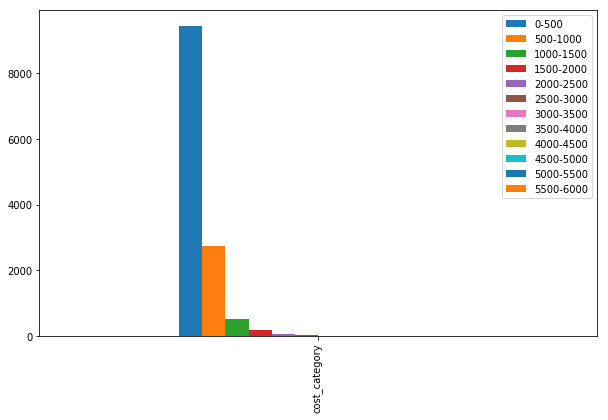

In [13]:

classes = []
labels = []
cost = 0
for i in range(0,12): 
    classes.append(cost)
    labels.append(str(cost)+"-"+str(cost+500))
    cost = cost + 500
classes.append(6000)
df["cost_category"]=pd.cut(df["approx_cost(for two people)"],bins=classes,labels=labels)
dic={}
for i in labels:
    dic[i]=len(np.where(df["cost_category"]==i)[0])
print(dic)
_=pd.DataFrame(dic,index=['cost_category']).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,6)

{'0-0.5': 0, '0.5-1': 0, '1-1.5': 0, '1.5-2': 3, '2-2.5': 77, '2.5-3': 836, '3-3.5': 3034, '3.5-4': 7523, '4-4.5': 1449, '4.5-5': 106}


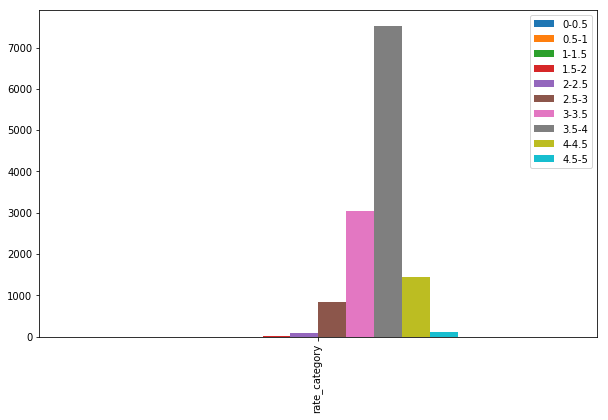

In [14]:
classes = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
labels = ["0-0.5","0.5-1","1-1.5","1.5-2","2-2.5","2.5-3","3-3.5","3.5-4","4-4.5","4.5-5"]
df["rate_category"]=pd.cut(df["rate"],bins=classes,labels=labels)
dic={}
for i in labels:
    dic[i]=len(np.where(df["rate_category"]==i)[0])
print(dic)
_=pd.DataFrame(dic,index=['rate_category'],columns=dic).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,6)

### cuisines and rest_type had multiple values seprated by comma. We splitted those values and then plotted the frequency distribution for each of the splitted values 

{'Bakery': 516, ' Beverage Shop': 62, ' Cafe': 96, ' Dessert Parlor': 111, ' Food Court': 11, ' Kiosk': 3, ' Quick Bites': 306, ' Sweet Shop': 24, 'Bar': 347, ' Casual Dining': 154, ' Lounge': 8, ' Pub': 27, 'Beverage Shop': 471, 'Bhojanalya': 1, 'Cafe': 763, ' Bakery': 44, ' Bar': 180, 'Casual Dining': 2740, ' Irani Cafee': 1, ' Microbrewery': 18, 'Club': 7, 'Confectionery': 14, 'Delivery': 1718, 'Dessert Parlor': 811, 'Dhaba': 8, 'Fine Dining': 93, 'Food Court': 240, 'Food Truck': 28, 'Kiosk': 68, 'Lounge': 88, 'Mess': 81, 'Microbrewery': 53, 'Pop Up': 1, 'Pub': 124, 'Quick Bites': 5656, ' Meat Shop': 1, ' Mess': 1, 'Sweet Shop': 204, 'Takeaway': 806, ' Delivery': 765}


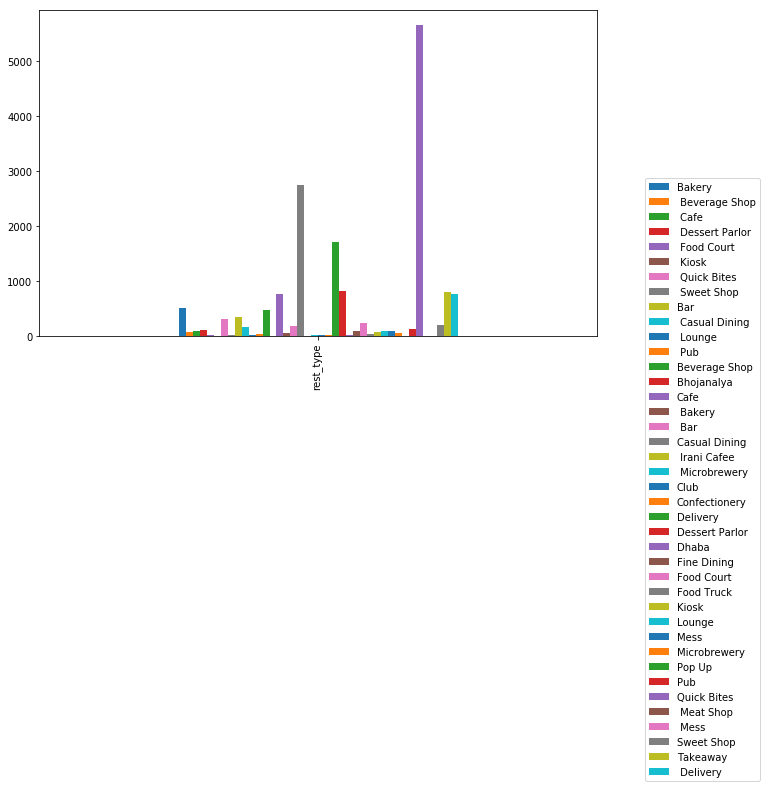

In [15]:
classes=np.unique(df["rest_type"])
newlist= classes.tolist()
newstring=','.join(newlist)
splitdata = newstring.split(',') #split string into a list
dic={}

for i in splitdata:
    dic[i]=len(np.where(df["rest_type"].str.contains(i))[0])
print(dic)
_=pd.DataFrame(dic,index=['rest_type'],columns=dic).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,6)
_.legend(loc='upper right',bbox_to_anchor=(1.3, 0.5))

{'African': 4, ' Burger': 305, ' Desserts': 853, ' Beverages': 857, ' Fast Food': 1499, 'American': 240, ' Asian': 153, ' Continental': 646, ' North Indian': 2106, ' South Indian': 922, ' Chinese': 3019, ' European': 73, ' BBQ': 136, ' Bakery': 121, ' Cafe': 143, ' Healthy Food': 89, ' Juices': 200, ' Sandwich': 215, ' Italian': 443, ' Steak': 73, ' Momos': 261, ' Bengali': 53, ' French': 16, ' Mexican': 57, ' Pizza': 237, ' Finger Food': 79, ' Mediterranean': 74, ' Salad': 178, ' Goan': 6, ' Rolls': 352, ' Modern Indian': 10, ' Tex-Mex': 9, ' Thai': 182, 'Andhra': 499, ' Biryani': 966, ' Hyderabadi': 67, ' Kebab': 244, ' Seafood': 321, ' Mughlai': 322, ' Chettinad': 25, ' Kerala': 131, ' Mangalorean': 84, 'Arabian': 266, ' Afghan': 15, ' Ice Cream': 233, ' Lebanese': 21, ' Middle Eastern': 29, ' Charcoal Chicken': 36, ' Greek': 5, 'Asian': 225, ' American': 147, ' Burmese': 5, ' Japanese': 30, ' Indonesian': 12, ' Korean': 15, ' Malaysian': 14, ' Vietnamese': 25, ' Singaporean': 6, ' 

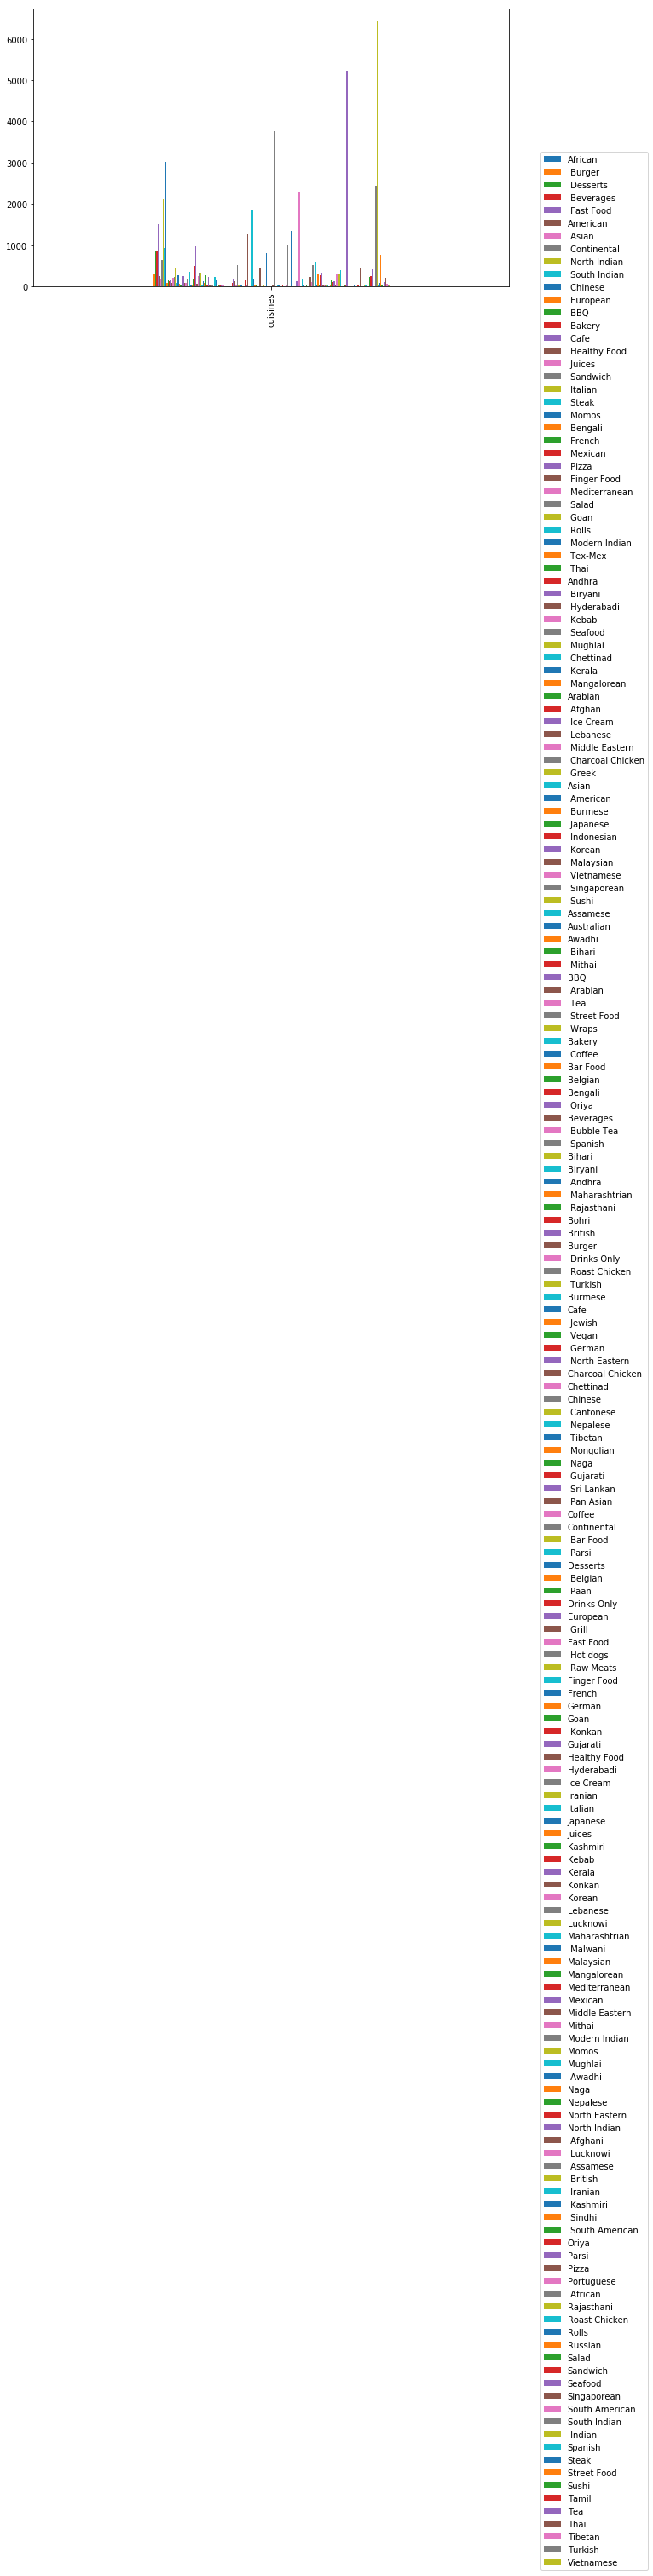

In [16]:
classes=np.unique(df["cuisines"])
newlist= classes.tolist()
newstring=','.join(newlist)
splitdata = newstring.split(',')
dic={}

for i in splitdata:
    dic[i]=len(np.where(df["cuisines"].str.contains(i))[0])
    
print(dic)
_=pd.DataFrame(dic,index=['cuisines']).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,6)
_.legend(loc='upper right',bbox_to_anchor=(1.3, 0.5))

# Observed trends in the data 
### We found some interesting trends in the dataset such as: more than half of the restaurants have online order facility (i.e. online_order[“Yes”]=7024). Most of the restaurants don’t allow customers to book table( book_table[“No”]=12038). Common customer rating across restaurants is in the range of 3 to 4.5 (3-3.5:3040, 3.5-4:7534, 4-4.5:1449).  A trend in restaurant type is observed that Quick Bites was the highest occurring or the restaurant having the highest frequency in the given dataset. It was also observed that the Chinese cuisine was having the highest frequency, meaning that it was the most popular cuisine across all restaurants given in the dataset. Apart from this, the lowest cost category(0-500) had the highest frequency i.e it was most common across all restaurant s in the dataset. Finally, Delivery type was the most occurring listed_in(type) in the dataset. We also plotted the average rating and average approximate cost for each neighbourhood. Also, we calculated the average cost and rating for the entire city: average cost(518.574), and average rating(3.628).

In [18]:
locations = df['location'].unique()
locations
rating = []
approx_cost = []
for i in locations:
    neighbour_data  = df[df["location"]==i]
    rating.append(neighbour_data["rate"].mean())
    approx_cost.append(neighbour_data["approx_cost(for two people)"].mean())
for i in range(0,len(locations)):
    print("\n")
    print("Location:",locations[i])
    print("Average Rating:",rating[i])
    print("Approximate Cost:",approx_cost[i])



Location: Banashankari
Average Rating: 3.624737713058708
Approximate Cost: 381.81208053691273


Location: Basavanagudi
Average Rating: 3.661419783416209
Approximate Cost: 339.08675799086757


Location: Mysore Road
Average Rating: 3.6464380874301012
Approximate Cost: 396.42857142857144


Location: Jayanagar
Average Rating: 3.7436900307017464
Approximate Cost: 451.41752577319585


Location: Kumaraswamy Layout
Average Rating: 3.514410154305627
Approximate Cost: 372.0238095238095


Location: Rajarajeshwari Nagar
Average Rating: 3.85
Approximate Cost: 725.0


Location: Vijay Nagar
Average Rating: 3.6144864337661073
Approximate Cost: 364.0971666051077


Location: Uttarahalli
Average Rating: 3.5354618122193497
Approximate Cost: 359.09090909090907


Location: JP Nagar
Average Rating: 3.632077874204551
Approximate Cost: 458.22113800942003


Location: South Bangalore
Average Rating: 3.5025085644013774
Approximate Cost: 343.92857142857144


Location: City Market
Average Rating: 3.59379198834006

In [20]:
def Average(lst): 
    return sum(lst) / len(lst) 
print("Location: Banglore city")
print("Average cost:",Average(approx_cost))
print("Average rating:",Average(rating))

Location: Banglore city
Average cost: 518.1154779398975
Average rating: 3.6281382575040273


# Neighbourhood with highest average:
### The neighborhood with the highest average rating is “Lavelle Road” and its average rating is “4.029801612253697”. On the basis of the retrieved result i.e. neighbourhood with highest average rating, we determined other associated characteristics such as Restaurant types, cost, and cuisines of the neighbourhood with highest average rating.
### Major characteristics of Lavelle Road neighborhood:
#### (1)	Restaurant types of this neighbourhood: 'Bakery': 6, ' Cafe': 3, ' Dessert Parlor': 3, 'Bar': 10, 'Beverage Shop': 3, 'Cafe': 7, ' Bakery': 1, ' Quick Bites': 1, 'Casual Dining': 21, ' Bar': 9, ' Irani Cafee': 1, ' Microbrewery': 4, 'Confectionery': 1, 'Delivery': 1, 'Dessert Parlor': 6, 'Fine Dining': 7, ' Lounge': 1, 'Kiosk': 1, 'Lounge': 4, 'Pub': 2, 'Quick Bites': 8
#### (2)	Cost of this neighbourhood: '0-500': 14, '500-1000': 13, '1000-1500': 15, '1500-2000': 7, '2000-2500': 5, '2500-3000': 4, '3000-3500': 0, '3500-4000': 1, '4000-4500': 0, '4500-5000': 0, '5000-5500': 0, '5500-6000': 0
#### (3)	Cuisines of this neighbourhood: 'American': 2, ' Finger Food': 2, 'Asian': 6, ' Japanese': 2, ' Thai': 3, ' North Indian': 6, ' Continental': 9, 'BBQ': 2, 'Bakery': 6, ' Cafe': 3, ' Italian': 10, ' Desserts': 6, ' French': 2, 'Beverages': 3, ' Ice Cream': 3, ' Fast Food': 3, 'Cafe': 7, ' Bakery': 2, ' Healthy Food': 1, 'Chinese': 6, ' Momos': 2, 'Continental': 12, ' BBQ': 1, ' Steak': 2, 'Desserts': 12, ' Beverages': 1, 'European': 4, ' Salad': 6, ' Juices': 1, ' Seafood': 3, 'Healthy Food': 3, ' Mediterranean': 2, ' Pizza': 2, ' Kebab': 1, ' Sandwich': 2, 'Ice Cream': 4, 'Italian': 14, ' Chinese': 5, 'Japanese': 4, ' Asian': 3, 'Mediterranean': 3, ' American': 1, 'Mexican': 1, ' Tex-Mex': 1, 'Modern Indian': 1, 'Mughlai': 3, 'North Eastern': 1, 'North Indian': 12, ' South Indian': 1, ' Mughlai': 1, 'Parsi': 1, 'Pizza': 3, 'Rajasthani': 1, 'Salad': 8, ' Burger': 1, 'Seafood': 4, ' Mangalorean': 1, 'South Indian': 2, ' Street Food': 1, 'Spanish': 2, ' European': 1, 'Thai': 4, ' Indonesian': 1

### We also plotted these values on the bar chart for proper visualization.


In [21]:
df.groupby("location").mean().max()

rate                              4.029663
votes                           807.064516
approx_cost(for two people)    2526.923077
dtype: float64

In [22]:
neighbourhood = df["location"].unique()
highest_rate = 0
location = ""
for i in neighbourhood:
    neighbour_data  = df[df["location"]==i] 
    average = neighbour_data["rate"].mean()
    if(average>highest_rate):
        highest_rate = average
        location = i

highest_rate_neighbourhood = df[df["location"]==location]

print("Highest average rate Location :" + location)
print("Highest average rate:" + str(highest_rate))


Highest average rate Location :Lavelle Road
Highest average rate:4.029663274983414


{'Bakery': 6, ' Cafe': 3, ' Dessert Parlor': 3, 'Bar': 10, 'Beverage Shop': 3, 'Cafe': 7, ' Bakery': 1, ' Quick Bites': 1, 'Casual Dining': 21, ' Bar': 9, ' Irani Cafee': 1, ' Microbrewery': 4, 'Confectionery': 1, 'Delivery': 1, 'Dessert Parlor': 6, 'Fine Dining': 7, ' Lounge': 1, 'Kiosk': 1, 'Lounge': 4, 'Pub': 2, 'Quick Bites': 8}


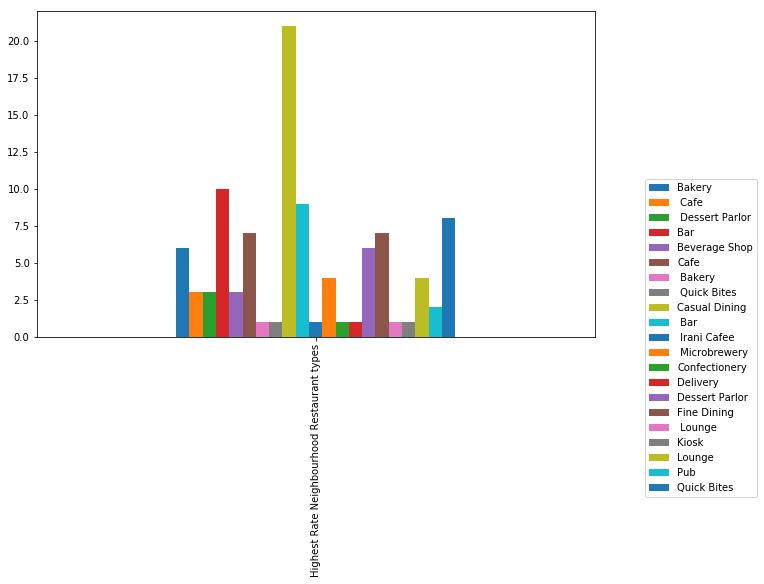

In [23]:
classes=np.unique(highest_rate_neighbourhood["rest_type"])
newlist= classes.tolist()
newstring=','.join(newlist)
splitdata = newstring.split(',') #split string into a list
dic={}

for i in splitdata:
    dic[i]=len(np.where(highest_rate_neighbourhood["rest_type"].str.contains(i))[0])
print(dic)
_=pd.DataFrame(dic,index=['Highest Rate Neighbourhood Restaurant types'],columns=dic).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,6)
_.legend(loc='upper right',bbox_to_anchor=(1.3, 0.5))

C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


{'0-500': 14, '500-1000': 13, '1000-1500': 15, '1500-2000': 7, '2000-2500': 5, '2500-3000': 4, '3000-3500': 0, '3500-4000': 1, '4000-4500': 0, '4500-5000': 0, '5000-5500': 0, '5500-6000': 0}


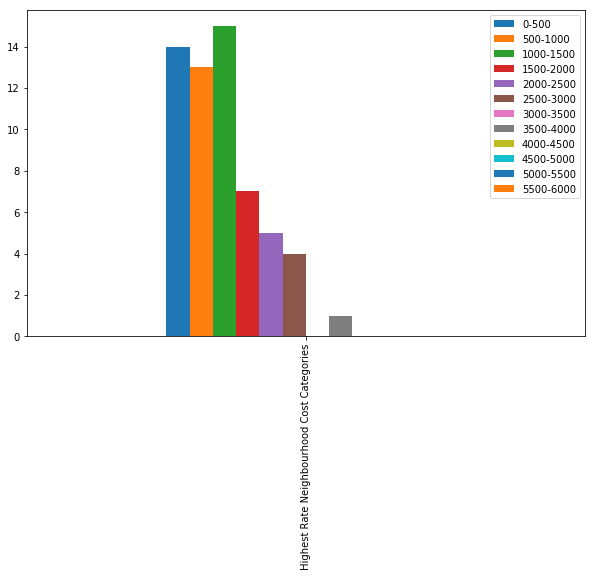

In [24]:
classes = []
labels = []
rate = 0
for i in range(0,12): 
    classes.append(rate)
    labels.append(str(rate)+"-"+str(rate+500))
    rate = rate + 500
classes.append(6000)
highest_rate_neighbourhood["cost_category"]=pd.cut(highest_rate_neighbourhood["approx_cost(for two people)"],bins=classes,labels=labels)
dic={}
for i in labels:
    dic[i]=len(np.where(highest_rate_neighbourhood["cost_category"]==i)[0])
print(dic)
_=pd.DataFrame(dic,index=['Highest Rate Neighbourhood Cost Categories'],columns=dic).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,6)

{'American': 2, ' Finger Food': 2, 'Asian': 6, ' Japanese': 2, ' Thai': 3, ' North Indian': 6, ' Continental': 9, 'BBQ': 2, 'Bakery': 6, ' Cafe': 3, ' Italian': 10, ' Desserts': 6, ' French': 2, 'Beverages': 3, ' Ice Cream': 3, ' Fast Food': 3, 'Cafe': 7, ' Bakery': 2, ' Healthy Food': 1, 'Chinese': 6, ' Momos': 2, 'Continental': 12, ' BBQ': 1, ' Steak': 2, 'Desserts': 12, ' Beverages': 1, 'European': 4, ' Salad': 6, ' Juices': 1, ' Seafood': 3, 'Healthy Food': 3, ' Mediterranean': 2, ' Pizza': 2, ' Kebab': 1, ' Sandwich': 2, 'Ice Cream': 4, 'Italian': 14, ' Chinese': 5, 'Japanese': 4, ' Asian': 3, 'Mediterranean': 3, ' American': 1, 'Mexican': 1, ' Tex-Mex': 1, 'Modern Indian': 1, 'Mughlai': 3, 'North Eastern': 1, 'North Indian': 12, ' South Indian': 1, ' Mughlai': 1, 'Parsi': 1, 'Pizza': 3, 'Rajasthani': 1, 'Salad': 8, ' Burger': 1, 'Seafood': 4, ' Mangalorean': 1, 'South Indian': 2, ' Street Food': 1, 'Spanish': 2, ' European': 1, 'Thai': 4, ' Indonesian': 1}


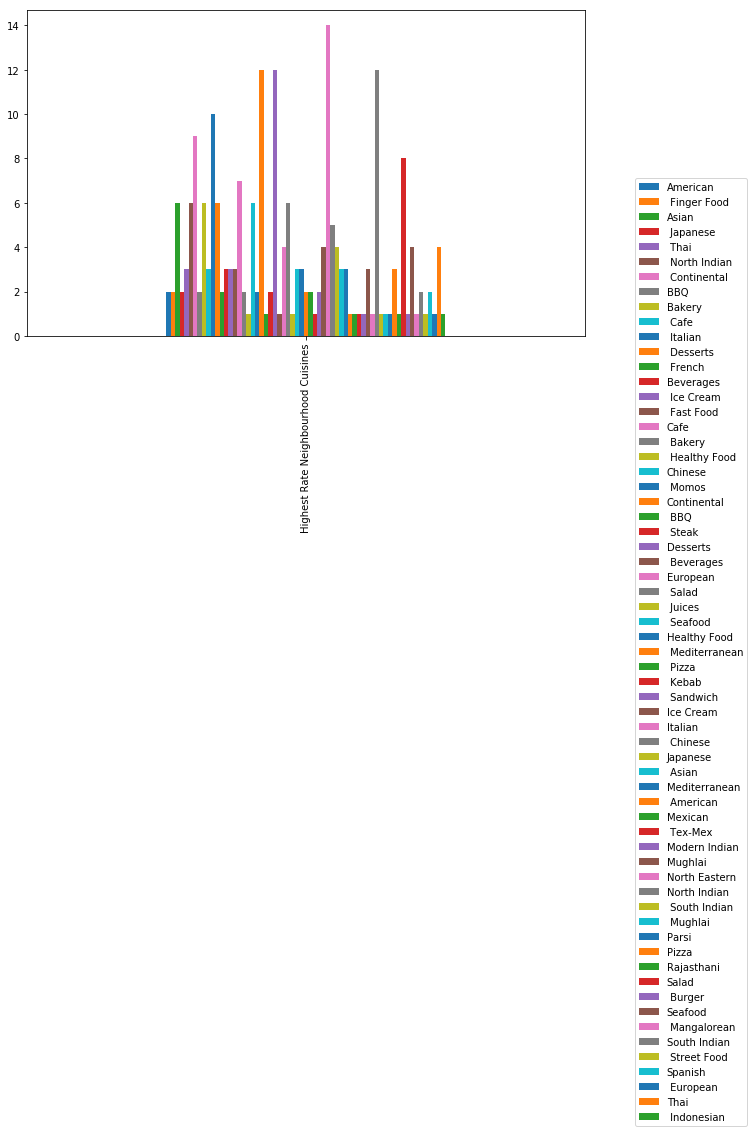

In [25]:
classes=np.unique(highest_rate_neighbourhood["cuisines"])
newlist= classes.tolist()
newstring=','.join(newlist)
splitdata = newstring.split(',')
dic={}

for i in splitdata:
    dic[i]=len(np.where(highest_rate_neighbourhood["cuisines"].str.contains(i))[0])
    
print(dic)
_=pd.DataFrame(dic,index=['Highest Rate Neighbourhood Cuisines'],columns=dic).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,6)
_.legend(loc='upper right',bbox_to_anchor=(1.3, 0.5))

# Data-preprocessing 
### Four columns will be chosen to build the model : location, rating, restaurant type, and cuisine. 
### The column location,rest_type and cuisine has categorical data. Therefore we used one-hot encoding to convert categorical data into float values. 

In [32]:
location_series = pd.Series(df["location"])
location_encoded = pd.get_dummies(location_series)
location_df = pd.DataFrame(location_encoded)
location_df.head()

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### The cuisines and rest_type has multiple values in a single tuple. They are first seperated out and then one-hot encoding is performed on them. 

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer

cuisines_encoder = MultiLabelBinarizer()
cuisines_encoded = cuisines_encoder.fit_transform(df["cuisines"].str.split(","))
cuisines_df = pd.DataFrame(cuisines_encoded)

In [34]:
rest_type_encoder = MultiLabelBinarizer()
rest_type_encoded = rest_type_encoder.fit_transform(df["rest_type"].str.split(","))
rest_type_df= pd.DataFrame(rest_type_encoded)

### All the features that would be used to build the model are then combined into a single dataframe.

In [60]:
merged=pd.concat([df["rate"],rest_type_df,cuisines_df,location_df],axis='columns')
merged.head()
merged.shape

(13028, 323)

### The data is split into test and train. We did not perform cross-fold validation initially because it takes long amount of time. 

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged, df["approx_cost(for two people)"], test_size=0.20)

# Task
## Forecast the approximate cost of a meal for two people using the attributes location, rating, restaurant type, and cuisine

### This task is a regression type of problem. Here a model needs to be created that can predict/forecast/estimate a numeric quantity i.e. approximate cost of a meal for two people. Regression task is used for predicting a numeric quantity. Hence, here regression will be used instead of classification. 

### In addition to this, the task which is being solved here is a supervised one. We have a target variable/ label available with the dataset i.e. approx_cost(for two people) and also we have a specific purpose for performing the task. Here the conditions of the supervised learning( Specific purpose and target variable) are satisfied. Supervised learning includes a target variable and a specific purpose for performing it, which is satisfied in the given task.



# Models used for implementation


# RandomForestRegressor
### RandomForestRegressor is an ensemble technique that can be used for high-accuracy regression. The main idea behind RandomForestRegressor is to combine multiple decision trees and build one powerfull model rather than using a single decision tree. By using multiple decision tress the accuracy would increase compared to single decision tress.

# Decision tree
### Decision tree can build regression models in a tree structure. It splits down a data set into smaller subsets simultaneously a related decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf node represents a decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

# AdaBoost
### AdaBoost is a  boosting technique that can combine multiple weak regressors into a single strong regressor such that the combined regressor is more powerful than individual ones and also overcomes the weakness of the individual regressors.

# Reasons for choosing these models
### Regression models such as Linear Regression or Logistic Regression are not considered as powerful as ensembles like Random Forest or AdaBoost. Models like Random forest are considered as very powerful model that can predict numeric values with high accuracy. Our main reason for choosing these models was to build a powerful model that can predict approximate cost with a higher accuracy. Another reason for choosing such models was the number parameters these models provided. Models such as Random Forest, Decision tree and AdaBoost provides a number of useful parameters such as max_features, n_estimators, max_depth etc. which can be used to fine tune the model to perform better. Parameters like max_depth allowed us to decide the level of accuracy we desired with our model. We decided to use such models because of the useful parameters that they provided. There are multiple parameters that will be fitted in the model, the above three models are better at handeling high amount of parameters.  

# Metrics used for evaluation
### We have decided to use  R2-score as our evaluation metric. On the basis of this metric, we will evaluate how well our model is performing. R^2 (coefficient of determination) regression score function in which the best possible score can be 1.0 and it can also be a negative value but this is only possible when the model is poorly performing. A constant model would predict a value of 0.0 . 

# Model Implementation
### Initially we built Randomforestregressor without tuning any parameter

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
RFReg = RandomForestRegressor().fit(X_train, y_train)
y_pred = RFReg.predict(X_test)
print("R2 Score:")
print(r2_score(y_test, y_pred))

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


R2 Score:
0.7454285789908823


### Second model we built was Decision tree without tuning any parameter

In [39]:
from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
y_pred = DTReg.predict(X_test)
print("R2 Score:")
print( r2_score(y_test, y_pred))

R2 Score:
0.6339761582830425


### Final model we built was AdaBoost without tuning any parameter

In [42]:
from sklearn.ensemble import AdaBoostRegressor
ABReg = AdaBoostRegressor(random_state=0).fit(X_train, y_train)
y_pred = ABReg.predict(X_test)
print("R2 score:")
print(r2_score(y_test, y_pred))

R2 score:
-0.393342885191166


### We got decent score for RandomForestRegressor and decision tree regressor, but for Ada Boost we received a negative r2 score which indicates that AdaBoost model is going completely against the trend provided by the data.

# Model Tuning 
### We used GridSearchCV() for automated parameter tuning. To reduce the processing time, we already gave some parameters to the models. GridSearchCV creates permutation of models using the different parameters we give as an input and finally selects the best parameters that gives the best accuracy. By changing the parameters of how a model will be built, change in the accuracy of the model in predicting testing data can be observed. 

## RandomForestRegressor

### We were only able to increase the r2 score by 4-5 percent by tuning the parameters. 

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
RFReg = RandomForestRegressor(max_depth=10, min_samples_split=2,random_state=0)
    
parameters = {'max_features':['auto','sqrt','log2'],'n_estimators':[5, 10,20,50]}
clf = GridSearchCV(RFReg, parameters, cv=5,n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("var:")
print(r2_score(y_test, y_pred))
print("Best parameters:")
print("Best Parameters: ",clf.best_params_)

var:
0.7737922108726487
Best parameters:
Best Parameters:  {'max_features': 'sqrt', 'n_estimators': 50}


## Decision Tree Regressor

### We were only able to increase the r2 score by 5 to 6 percent margin by tuning the parameters. 

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
DTReg = DecisionTreeRegressor(random_state=0)
parameters = {'max_features':['auto','sqrt','log2'],'max_depth':[None,2,4,6,8,12],'splitter':['best','random']}
clf_2 = GridSearchCV(DTReg, parameters, cv=5,n_jobs=-1)
clf_2.fit(X_train, y_train)
y_pred = clf_2.predict(X_test)
print("R2 Score:")
print( r2_score(y_test, y_pred))
print("Best Parameters: ",clf_2.best_params_)

R2 Score:
0.6807305046564962
Best Parameters:  {'max_depth': 8, 'max_features': 'auto', 'splitter': 'best'}


## AdaBoost Regressor

### For AdaBoost regressor the processing time was very high. So we used PCA( Principle Component Analysis) to reducte the dimensions and ultimately the processing times. Principal component analysis (PCA) is a statistical method that uses an orthogonal transformation to transform a set of observations of possibly correlated variables  into a set of values of linearly uncorrelated variables called principal components. 

### After Fine tuning the model, we were able to improve the performance drastically. But still the model did not give desirable result. 

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(location_df)

location_dataFrame = pd.DataFrame(data = principalComponents, columns = ['location_1', 'location_2']) 

location_dataFrame.shape



(13028, 2)

In [46]:
principalComponents = pca.fit_transform(cuisines_df)

cuisines_dataFrame = pd.DataFrame(data = principalComponents, columns = ['cuisines_1', 'cuisines_2']) 

cuisines_dataFrame.shape

(13028, 2)

In [47]:
principalComponents = pca.fit_transform(rest_type_df)

rest_type_dataFrame = pd.DataFrame(data = principalComponents, columns = ['rest_type_1', 'rest_type_2']) 

rest_type_dataFrame.shape

(13028, 2)

In [48]:
merged_pca=pd.concat([df["rate"],rest_type_dataFrame,cuisines_dataFrame,location_dataFrame],axis='columns')
merged_pca.head()
merged_pca.shape

(13028, 7)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(merged_pca, df["approx_cost(for two people)"], test_size=0.20)

In [54]:
from sklearn.ensemble import AdaBoostRegressor
ABReg = AdaBoostRegressor(random_state=0)
parameters = {'n_estimators':[10,20,40,60,80],'loss':['linear', 'square', 'exponential'],'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.7]}
clf_3 = GridSearchCV(ABReg, parameters, cv=5,n_jobs=-1)
clf_3.fit(X_train, y_train)
y_pred = clf_3.predict(X_test)
print("R2 Score:")
print(r2_score(y_test, y_pred))
print("Best Parameters: ",clf_3.best_params_)

R2 Score:
0.5331087462843889
Best Parameters:  {'learning_rate': 0.7, 'loss': 'square', 'n_estimators': 20}


# Cross-fold validation
### Cross-fold-validation is a statistical procedure which is used to predict the performance and accuracy of machine learning models. It is used to check model overfitting. It divided the data into sets of test and train, each set containing a different portion of the data as the test and train. It builds data based on the sets and calculates the score measure (provied as input eg.Accuracy) of each model. The scores can be averaged to measure overall score provided by the model. 

### As the model takes too long to build, we do not use the GridSearchCV(), we take the best parameters provided by previously built models and use it to build new models for cross fold validation.

### RandomForestRegressor and DecisionTreeRegressor showed less change between the r2_score observed above and after cross fold validation. While AdaBoost showed high decrease in performance, which suggests that the model is overfitted.

In [71]:
from sklearn.model_selection import cross_val_score
RFReg_tuned=RandomForestRegressor(max_depth=None, min_samples_split=2,random_state=0,max_features='sqrt', n_estimators=50)
scores_1 = cross_val_score(RFReg_tuned, merged, df["approx_cost(for two people)"], cv=5, scoring='r2')
print("Accuracy:",scores_1.mean())

Accuracy: 0.7583770382130679


In [72]:
DTReg_tuned = DecisionTreeRegressor(random_state=0,max_features='auto',max_depth=8,splitter='best')
scores_2 = cross_val_score(DTReg_tuned, merged, df["approx_cost(for two people)"], cv=5, scoring='r2')
print("Accuracy:",scores_2.mean())

Accuracy: 0.669726285134667


In [73]:
ABReg_tuned = AdaBoostRegressor(random_state=0,learning_rate= 0.7, loss='square', n_estimators= 20)
scores_3 = cross_val_score(ABReg_tuned, merged, df["approx_cost(for two people)"], cv=5, scoring='r2')
print("Accuracy:",scores_3.mean())

Accuracy: 0.04217166139208073


# Comparing all of the built models using BoxPlot and Barchart

## The first bar-chart shows the average accuracy of each of the models. From this bar chart it can be observed that Random Forest has the highest average accuracy, while the average accuracy of AdaBoost is the lowest. 

## The second bar-chart plots the variance in each of the models. From this bar chart, it can be observed that the AdaBoost model has the highest amount of variance, hence it gives the lowest accuracy. While the RandomForest model has the lowest amount of variance, hence it gives the highest accuracy.

## The third plotting is the box plotting. A box-plot basically summarizes the data. The small circles outside the box region are outliers. RandomForest is a good model because the box region of it is narrowed and well summarized. While for AdaBoost, the box region is comparatively large and is not summarizing the data properly. 

## By using cross-fold validation and plotting techniques, it is quite clear that RandomForestRegressor is the best model among these three. While AdaBoost is the worst model in terms of accuracy and variance. 

## Decision Tree model is the middle model which is between the best model (RandomForest Regressor) and worst model (AdaBoost). In terms of accuracy, the decision tree model is not that much behind from the RandomForest Regressor and it is much better than the AdaBoost model.

In [79]:
import pandas as pd_compare
df=pd_compare.DataFrame(scores_1,columns=['Random Forest'])
df=df.assign(DecisionTree=scores_2)
df=df.assign(AdaBoost=scores_3)

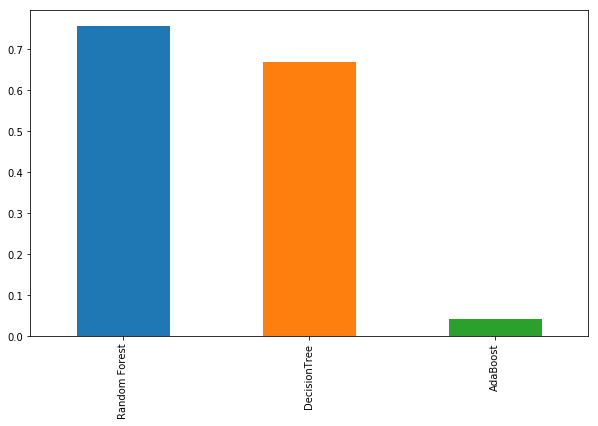

In [80]:
df.mean().plot(kind='bar')

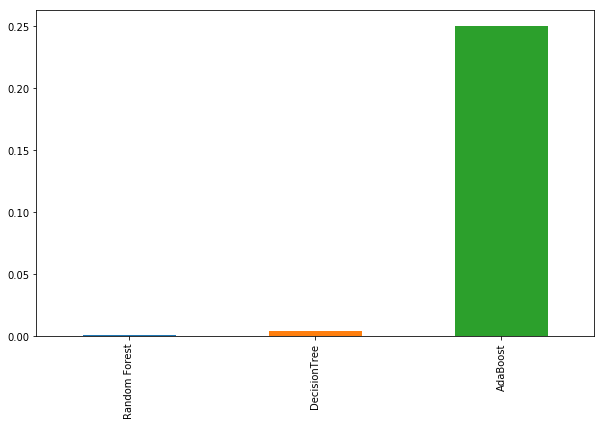

In [83]:
df.var().plot(kind='bar')

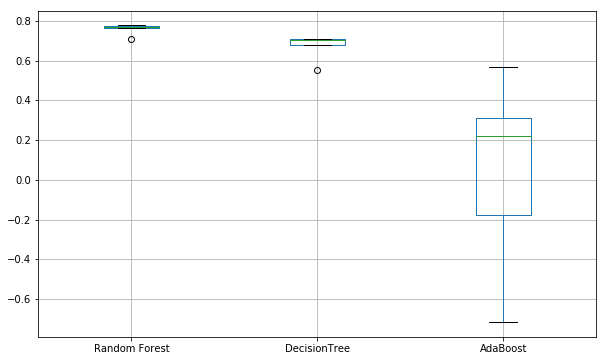

In [82]:
df.boxplot()

# Manage Overfitting
### We are using cross fold validation to determine whether our models are overfitting or not. Cross-fold validation allowes us to get a more precise or an accurate estimation of the performace of our models. RandomForest Regressor is the best model and it is also not overfitting. In RandomForest Regressor, the training set accuracy was around 77 while the cross-fold validation accuracy was 75. This suggest that even with change in testing data set, the accuracy of the model does not defer by a large margin. Which means that the RandomForest Regressor model is not overfitted. Decision tree also gives out similar result, where the training set accuracy was around 68 and the cross fold validation was around 67.

### AdaBoost showed drastic difference between the training set accuracy and the cross-fold validation accuracy. It tumbled down to 0.042 from 0.53. Which suggests that AdaBoost was highly overfitted.

# References
### [1]"pyplot — Matplotlib 2.0.2 documentation", Matplotlib.org, 2019. [Online]. Available: https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend. [Accessed: 03- Jul- 2019].

### [2]"104.2.7 Identifying and Removing Duplicate values from dataset in Python – Statinfer", Statinfer.com, 2019. [Online]. Available: https://statinfer.com/104-2-7-identifying-and-removing-duplicate-values-from-dataset-in-python/. [Accessed: 03- Jul- 2019].

### [3]"A Beginners Guide to Random Forest Regression - Data Driven Investor - Medium", Medium, 2019. [Online]. Available: https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb. [Accessed: 03- Jul- 2019].

### [4]"Decision Trees Explained Easily - Chirag Sehra - Medium", Medium, 2019. [Online]. Available: https://medium.com/@chiragsehra42/decision-trees-explained-easily-28f23241248. [Accessed: 03- Jul- 2019].

### [5]"AdaBoost Tutorial · Chris McCormick", Mccormickml.com, 2019. [Online]. Available: https://mccormickml.com/2013/12/13/adaboost-tutorial/. [Accessed: 03- Jul- 2019].

### [6]"sklearn.metrics.r2_score — scikit-learn 0.21.2 documentation", Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html. [Accessed: 03- Jul- 2019].

### [7]"Principal component analysis", En.wikipedia.org, 2019. [Online]. Available: https://en.wikipedia.org/wiki/Principal_component_analysis. [Accessed: 03- Jul- 2019].

### [8]"In Depth: Parameter tuning for Random Forest - All things AI - Medium", Medium, 2019. [Online]. Available: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d. [Accessed: 03- Jul- 2019].

### [9]J. Brownlee, "A Gentle Introduction to k-fold Cross-Validation", Machine Learning Mastery, 2019. [Online]. Available: https://machinelearningmastery.com/k-fold-cross-validation/. [Accessed: 03- Jul- 2019].

### [10]"sklearn.cross_validation.cross_val_score — scikit-learn 0.17.1 documentation", Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.cross_val_score.html. [Accessed: 03- Jul- 2019].

### [7]"Pandas Tutorial 1: Pandas Basics (read_csv, DataFrame, Data Selection, etc.)", Data36, 2019. [Online]. Available: https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/. [Accessed: 03- Jul- 2019]

### [8]"How to Filter a Pandas Dataframe Based on Null Values of a Column?", Python, R, and Linux Tips, 2019. [Online]. Available: https://cmdlinetips.com/2018/03/how-to-filter-a-pandas-dataframe-based-on-null-values-of-a-column/. [Accessed: 03- Jul- 2019]

### [9]"Python | Pandas dataframe.drop_duplicates() - GeeksforGeeks", GeeksforGeeks, 2019. [Online]. Available: https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/. [Accessed: 03- Jul- 2019]

### [10]"pandas.DataFrame.fillna — pandas 0.24.2 documentation", Pandas.pydata.org, 2019. [Online]. Available: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html. [Accessed: 03- Jul- 2019]

### [11]"pandas.cut — pandas 0.23.4 documentation", Pandas.pydata.org, 2019. [Online]. Available: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html. [Accessed: 03- Jul- 2019]

### [12]"The Dummy’s Guide to Creating Dummy Variables", Towards Data Science, 2019. [Online]. Available: https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40. [Accessed: 03- Jul- 2019]

### [13]"One-Hot Encode Features With Multiple Labels", Chrisalbon.com, 2019. [Online]. Available: https://chrisalbon.com/machine_learning/preprocessing_structured_data/one-hot_encode_features_with_multiple_labels/. [Accessed: 03- Jul- 2019]

### [14]"sklearn.decomposition.PCA — scikit-learn 0.21.2 documentation", Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html. [Accessed: 03- Jul- 2019]

### [15]"Matplotlib: Python plotting — Matplotlib 3.1.0 documentation", Matplotlib.org, 2019. [Online]. Available: https://matplotlib.org/. [Accessed: 03- Jul- 2019].

### [16]"sklearn.model_selection.GridSearchCV — scikit-learn 0.21.2 documentation", Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html. [Accessed: 03- Jul- 2019]

### [17]"3.2.4.3.2. sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.2 documentation", Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html. [Accessed: 03- Jul- 2019]

### [18]"sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.2 documentation", Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html. [Accessed: 03- Jul- 2019].
